## PyTorch

PyTorch is an open-source machine learning library for Python which allows maximum flexibility and speed on scientific computing for deep learning. It is a replacement for NumPy to use the power of GPUs.

## Tensors in PyTorch

A tensor is an n-dimensional data container which is similar to NumPy’s ndarray. For example, 1d-tensor is a vector, 2d-tensor is a matrix, 3d-tensor is a cube, and 4d-tensor is a vector of cubes.

Let us see how we can create a tensor in PyTorch. To Initialize a tensor, we can either assign values directly or set the size of the tensor. torch.Tensor(n,m) will initialize a tensor with size n x m. (Very similar to NumPy ndarray)

In [ ]:
import torch
# create a tensor
new_tensor = torch.Tensor([[1, 2], [3, 4]])
# create a 2 x 3 tensor with random values
empty_tensor = torch.Tensor(2, 3)
# create a 2 x 3 tensor with random values between -1and 1
uniform_tensor = torch.Tensor(2, 3).uniform_(-1, 1)
# create a 2 x 3 tensor with random values from a uniform distribution on the interval [0, 1)
rand_tensor = torch.rand(2, 3)
# create a 2 x 3 tensor of zeros
zero_tensor = torch.zeros(2, 3)

To access or replace elements in a tensor, you can use indexing. For example, new_tensor[0][0] will return a tensor object that contains the element at position 0, 0. A scalar object can be also accessed via .item(). Additionally, slicing can also be used to access every row and column in a tensor.

In [ ]:
new_tensor = torch.Tensor([[1, 2], [3, 4]])
# replace an element at position 0, 0
new_tensor[0][0] = 5
print(new_tensor)                 # tensor([[ 5.,  2.],[ 3.,  4.]])
# access an element at position 1, 0
print(new_tensor[1][0])           # tensor([ 3.])
print(new_tensor[1][0].item())    # 3.
## slicing examples
slice_tensor = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# elements from every row, first column
print(slice_tensor[:, 0])         # tensor([ 1.,  4.,  7.])
# elements from every row, last column
print(slice_tensor[:, -1])        # tensor([ 3.,  6.,  9.])
# all elements on the second row
print(slice_tensor[2, :])         # tensor([ 4.,  5.,  6.])
# all elements from first two rows
print(slice_tensor[:2, :])        # tensor([[ 1.,  2.,  3.],[ 4.,  5.,  6.]])

tensor([[5., 2.],
        [3., 4.]])
tensor(3.)
3.0
tensor([1., 4., 7.])
tensor([3., 6., 9.])
tensor([7., 8., 9.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In order to check the type of a tensor, .type() is used. For the shape of a tensor, either .shape or .size() can be used. .dim() is for accessing the dimension of a tensor.

In [ ]:
new_tensor = torch.Tensor([[1, 2], [3, 4]])
# type of a tensor
print(new_tensor.type())   # 'torch.FloatTensor'
# shape of a tensor
print(new_tensor.shape)    # torch.Size([2, 2])
print(new_tensor.size())   # torch.Size([2, 2])
# dimension of a tensor
print(new_tensor.dim())    # 2

torch.FloatTensor
torch.Size([2, 2])
torch.Size([2, 2])
2


To reshape a tensor, simply use the code .view(n,m). This will convert the shape of a tensor to the size n x m.

In [ ]:
reshape_tensor = torch.Tensor([[1, 2], [3, 4]])
reshape_tensor.view(1,4)   # tensor([[ 1.,  2.,  3.,  4.]])
reshape_tensor.view(4,1)   # tensor([[ 1.],[ 2.],[ 3.],[ 4.]])

tensor([[1.],
        [2.],
        [3.],
        [4.]])

Sometimes, it is useful to convert Numpy ndarray to a Pytorch tensor and vice versa. Use .from_numpy() when converting from a NumPy ndarray to a PyTorch tensor. Conversely, use .numpy() to convert back to a NumPy ndarray.


In [ ]:
import numpy
np_ndarray = numpy.random.randn(2,2)
# NumPy ndarray to PyTorch tensor
to_tensor = torch.from_numpy(np_ndarray)
# PyTorch tensor to NumPy array
to_ndarray = to_tensor.numpy()

## Basic Tensor Operations

Here are a few basic examples of tensor operations in PyTorch:
**Transpose:** .t() or .permute(-1, 0)
**Cross Product:** a.cross(b) or torch.cross(a, b)
**Matrix Product:** .mm()
**Elementwise Multiplication:** .mul()


In [ ]:
# regular transpose function
to_tensor.t()
# transpose via permute function
to_tensor.permute(-1,0)

tensor([[-0.9653, -1.7315],
        [-1.1257,  0.1364]], dtype=torch.float64)

In [ ]:
tensor_1 = torch.randn(3, 3)
tensor_2 = torch.randn(3, 3)
cross_prod = tensor_1.cross(tensor_2)
print(cross_prod)

tensor([[ 0.0272, -0.1215,  0.6089],
        [ 0.1257,  0.7205,  1.6606],
        [ 0.6717, -0.7918,  0.2335]])


In [ ]:
matrix_prod = tensor_1.mm(tensor_2)
print(matrix_prod)

tensor([[ 0.8889, -0.5960, -0.8216],
        [-0.6965, -1.4320,  1.5274],
        [ 0.0342, -0.0341, -1.5714]])


In [ ]:
element_mult = tensor_1.mul(tensor_2)
print(element_mult)

tensor([[ 0.1825, -2.6402, -0.5355],
        [ 0.3575, -0.0868,  0.0239],
        [ 0.0064,  0.0394, -1.3602]])


## GPU/CUDA

Tensors can also be used on a GPU that supports CUDA to accelerate computing.

In [ ]:
if torch.cuda.is_available():
    tensor_1 = tensor_1.cuda()
    tensor_2 = tensor_2.cuda()
    tensor_1 + tensor_2

## Gradient Descent

Our biggest question is, how we train a model to determine the weight parameters which will minimize our error function. 
Let us see how gradient descent help us to train our model.

Recall, the linear model will begin with a random initial parameter recall when we initialize the model with the linear function. It indeed gave us a random initial parameter.

Let's ignore the bias value for now and based on the error associated with this initial parameter A. Our motive is to move in the direction that gives us the smaller error.

If we take the gradient of error function the derivatives of the slope of the tangent at the current value that we met, this derivative will take us in the direction of the highest error.

So, we move it the negative direction of the gradient, which will take us in the direction of the lowest error. We take current to weight, and we subtract the derivatives of that function at that same point.

It will take us in the direction of the least error.

In a summarized way, first, we have to compute the derivatives of the loss function and then submission in the current weight value of the line. Whatever the weight maybe, they will give you the gradient value. This gradient value is then subtracted from the current weight A0, to give the new updated weight A1. The new weight should result in a smaller error than the previous one. We will do that iteratively until we obtain the optimal parameter for our line model to fit the data.

We are descending with the gradient, however, to ensure optimal results. One should descend in minimal steps. As such, we will multiply the gradient by a minimal number known as the learning rate. The value of the learning rate is empirical. Although a good standard starting value tends to be one over 10 or 1 over 100, the learning rate needs to be sufficiently small since as the line adjusting itself you never wanted to move drastically in one direction as that can cause for unwanted divergent behavior.

## Autograd

It is an automatic differentiation package provided by PyTorch. This is a must-have package when performing the gradient descent for the optimization of the neural network models. To use this function, you need to initialize your tensor with requires_grad=True. If it is set to False then the gradient will not be calculated automatically. Moreover, the gradient can only be calculated if your variable is a function of the variable you want to differentiate. In our case, it is the function of x as seen below.

In [ ]:
import torch 
x = torch.ones(1, requires_grad=True)
print(x.grad)    # returns None

None


As you see above, print(x.grad) will return None since x is a tensor we initialized, a scalar, so there is nothing to be calculated. On the other hand, the gradient for x is calculated in the code below because z is a function of y and y is a function of x.

In [ ]:
x = torch.ones(1, requires_grad=True)
y = x + 2
z = y * y * 2
z.backward()     # automatically calculates the gradient
print(x.grad)    # ∂z/∂x = 12

tensor([12.])


Here, .backward() performs the backpropagation automatically and x.grad holds the calculated gradient for x. In mathematical notation, x.grad is ∂z/∂x.

## Single-layer Perceptron

Let’s first observe how the single-layer perceptron model is implemented and compare it with the feedforward model. Single-layer perceptron takes data as input and its weights are summed up then an activation function is applied before sent to the output layer. For the single-layer perceptron model, the heavy-side step function is the activation that is normally used.

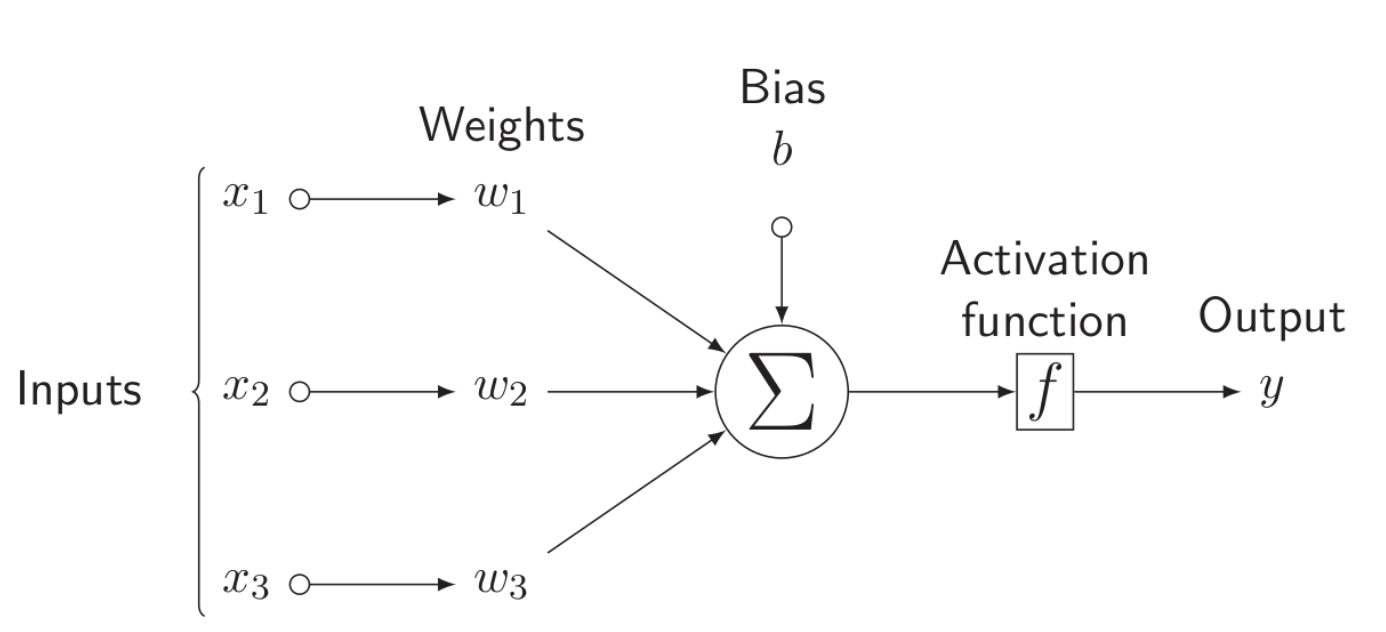

in the example code for the perceptron below we are using ReLU() since heavy-side step function is non-differentiable at x = 0 and it has 0 derivatives elsewhere, meaning the gradient descent won’t be able to make a progress in weight updates. Thus, the heavy-side step function is not suitable for the deep neural network.


## So what is the activation function?

The activation functions in the neural network introduce the non-linearity to the linear output. It defines the output of a layer, given data, meaning it sets the threshold for making the decision of whether to pass the information or not. You can choose different activation functions depending on the task you would like to achieve.

So in the example we’re about to see below, the fully-connected layer self.fc outputs linear information and self.relu makes it non-linear. One thing to note is that without the activation functions, multiple linear layers are equivalent to a single layer in the neural network.
Now, back to the perceptron model.

In [ ]:
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(1,1)
        self.relu = torch.nn.ReLU() # instead of Heaviside step fn
    def forward(self, x):
        output = self.fc(x)
        output = self.relu(x) # instead of Heaviside step fn
        return output

As you can see, the input x is passed to a fully-connected layer self.fc(x), then a step function self.relu(x) is applied and is returned as an output. 

## Feedforward Neural Network

Now let’s look at how to build a simple feedforward network model. Unlike the single-layer perceptron, the feedforward models have hidden layers in between the input and the output layers. After every hidden layer, an activation function is applied to introduce non-linearity. Below is an example feedforward model I built.

In [ ]:
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            output = self.sigmoid(output)
            return output

For this example, we only put one hidden layer but you can add as many hidden layers as you want. When you have more than two hidden layers, the model is also called the deep/multilayer feedforward model or multilayer perceptron model(MLP).

After the hidden layer, we use ReLU as activation before the information is sent to the output layer. This is to introduce non-linearity to the linear output from the hidden layer as mentioned earlier. What ReLU does here is that if the function is applied to a set of numerical values, any negative value will be converted to 0 otherwise the values stay the same. For example, if the input set is [-1,0,4,-5,6] then the function will return [0,0,4,0,6].

As an output activation function, we used Sigmoid. This is because the example we want to show you later is a binary classification task, meaning we have binary categories to predict from. Sigmoid is the good function to use because it calculates the probability(ranging between 0 and 1) of the target output being label 1. As said in the previous section, the choice of the activation function depends on your task. Now, let’s see a binary classifier example using this model.

## Training Example

### Create random data points

We are creating random data points using Scikit Learn’s make_blobs function and assign binary labels {0,1}. 

In [ ]:
# CREATE RANDOM DATA POINTS
from sklearn.datasets import make_blobs
def blob_label(y, label, loc): # assign labels
    target = numpy.copy(y)
    for l in loc:
        target[y == l] = label
    return target
x_train, y_train = make_blobs(n_samples=40, n_features=2, cluster_std=1.5, shuffle=True)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(blob_label(y_train, 0, [0]))
y_train = torch.FloatTensor(blob_label(y_train, 1, [1,2,3]))
x_test, y_test = make_blobs(n_samples=10, n_features=2, cluster_std=1.5, shuffle=True)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(blob_label(y_test, 0, [0]))
y_test = torch.FloatTensor(blob_label(y_test, 1, [1,2,3]))

## Model, Criterion, Optimizer

Let’s define the model with input dimension 2 and hidden dimension 10. For the loss function (criterion), we are using BCELoss()(Binary Cross Entropy Loss) since our task is to classify binary labels. The optimizer is SGD (Stochastic Gradient Descent) with learning rate 0.01.

In [ ]:
model = Feedforward(2, 10)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

## Train the model

To see how the model is improving, we can check the test loss before the model training and compare it with the test loss after the training.

In [ ]:
model.eval()
y_pred = model(x_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 1.1210570335388184


model.eval() here sets the PyTorch module to evaluation mode. We want to do this because we don’t want the model to learn new weights when we just want to check the loss before training. To train, we switch the mode back to training mode.

In [ ]:
model.train()
epoch = 20
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.69133460521698
Epoch 1: train loss: 0.6631624698638916
Epoch 2: train loss: 0.6365510821342468
Epoch 3: train loss: 0.6114415526390076
Epoch 4: train loss: 0.587772011756897
Epoch 5: train loss: 0.565477728843689
Epoch 6: train loss: 0.5444921255111694
Epoch 7: train loss: 0.5247472524642944
Epoch 8: train loss: 0.5061746835708618
Epoch 9: train loss: 0.48870640993118286
Epoch 10: train loss: 0.47227510809898376
Epoch 11: train loss: 0.456815630197525
Epoch 12: train loss: 0.4422645568847656
Epoch 13: train loss: 0.428561270236969
Epoch 14: train loss: 0.4156479835510254
Epoch 15: train loss: 0.4034702777862549
Epoch 16: train loss: 0.3919767141342163
Epoch 17: train loss: 0.38110631704330444
Epoch 18: train loss: 0.37077730894088745
Epoch 19: train loss: 0.36100155115127563


Let’s start training. First we switch the module mode to .train() so that new weights can be learned after every epoch. optimizer.zero_grad() sets the gradients to zero before we start backpropagation. This is a necessary step as PyTorch accumulates the gradients from the backward passes from the previous epochs.
After the forward pass and the loss computation, we perform backward pass by calling loss.backward(), which computes the gradients. Then optimizer.step() updates the weights accordingly.

## Evaluation

Okay, the training is now done. Let’s see how the test loss changed after the training. Again, we switch the module mode back to the evaluation mode and check the test loss as the example below.


In [ ]:
model.eval()
y_pred = model(x_test)
after_train = criterion(y_pred.squeeze(), y_test) 
print('Test loss after Training' , after_train.item())

Test loss after Training 1.6307334899902344


In order to improve the model, you can try out different parameter values for your hyperparameters(ie. hidden dimension size, epoch size, learning rates). You can also try changing the structure of your model (ie. adding more hidden layers) to see if your mode improves. There is a number of different hyperparameter and model selection techniques popularly used but this is the general idea behind it. In the end, you can select the hyperparameters and the model structure that gives you the best performance.